In [25]:
'''
(b) Classification: From data exploration, we can notice that the the outcome value (i.e. the
burned area) is zero for many samples, meaning that the corresponding forests are not affected
by fire. 

Therefore we can dichotomize the outcome variable, based on whether its corresponding
value is zero or greater than zero. 

    This creates the following two classes:

        Class 0: Forests not affected by the fire, i.e. area = 0

        Class 1: Forests affected by the fire, i.e. area > 0

        After dichotomizing the outcome variable, we can run a classification task to predict whether or
        not fire will occur in a certain forest based on the input features.

'''
from sklearn import preprocessing
import pandas as pd
import numpy as np
import csv
import random
from numpy import genfromtxt
import math
import matplotlib as plt


In [19]:

'''
Normalizing features.
'''

def normalizeData(inDF):
    x = inDF[1:len(inDF)]
    min_max_scaler = preprocessing.MinMaxScaler()
    normalizedDF = pd.DataFrame(min_max_scaler.fit_transform(x))
    return normalizedDF
    
trainData_x = pd.DataFrame(trainCSV[:,0][1:len(trainCSV)], columns=['x'])
trainData_y = pd.DataFrame(trainCSV[:,1][1:len(trainCSV)], columns=['y'])
trainData_month = pd.DataFrame(trainCSV[:,2][1:len(trainCSV)], columns=['month'])
trainData_day = pd.DataFrame(trainCSV[:,3][1:len(trainCSV)], columns=['day'])
trainData_ffmc = pd.DataFrame(trainCSV[:,4][1:len(trainCSV)], columns=['FFMC'])
trainData_dmc = pd.DataFrame(trainCSV[:,5][1:len(trainCSV)], columns=['DMC'])
trainData_dc = pd.DataFrame(trainCSV[:,6][1:len(trainCSV)], columns=['DC'])
trainData_isi = pd.DataFrame(trainCSV[:,7][1:len(trainCSV)], columns=['ISI'])
trainData_temp = pd.DataFrame(trainCSV[:,8][1:len(trainCSV)], columns=['temp'])
trainData_rh = pd.DataFrame(trainCSV[:,9][1:len(trainCSV)], columns=['RH'])
trainData_wind = pd.DataFrame(trainCSV[:,10][1:len(trainCSV)], columns=['wind'])
trainData_rain = pd.DataFrame(trainCSV[:,11][1:len(trainCSV)], columns=['rain'])
trainData_outcome = pd.DataFrame(trainCSV[:,12][1:len(trainCSV)], columns=['outcome'])


normalTrainData = normalizeData(trainData_x)
ny = normalizeData(trainData_y)
nm = normalizeData(trainData_month)
nd = normalizeData(trainData_day)
n_ffmc = normalizeData(trainData_ffmc)
n_dmc = normalizeData(trainData_dmc)
n_dc = normalizeData(trainData_dc)
n_isi = normalizeData(trainData_isi)
n_temp = normalizeData(trainData_temp)
n_rh = normalizeData(trainData_rh)
n_wind = normalizeData(trainData_wind)
n_rain = normalizeData(trainData_rain)


normalTrainData['1']=ny
normalTrainData['2']=nm
normalTrainData['3']=nd
normalTrainData['4']=n_ffmc
normalTrainData['5']=n_dmc
normalTrainData['6']=n_dc
normalTrainData['7']=n_isi
normalTrainData['8']=n_temp
normalTrainData['9']=n_rh
normalTrainData['10']=n_wind
normalTrainData['11']=n_rain
normalTrainData['outcome']=trainData_outcome
normTrainData = normalTrainData.values


In [4]:
testData_x = pd.DataFrame(testCSV[:,0][1:len(testCSV)], columns=['x'])
testData_y = pd.DataFrame(testCSV[:,1][1:len(testCSV)], columns=['y'])
testData_month = pd.DataFrame(testCSV[:,2][1:len(testCSV)], columns=['month'])
testData_day = pd.DataFrame(testCSV[:,3][1:len(testCSV)], columns=['day'])
testData_ffmc = pd.DataFrame(testCSV[:,4][1:len(testCSV)], columns=['FFMC'])
testData_dmc = pd.DataFrame(testCSV[:,5][1:len(testCSV)], columns=['DMC'])
testData_dc = pd.DataFrame(testCSV[:,6][1:len(testCSV)], columns=['DC'])
testData_isi = pd.DataFrame(testCSV[:,7][1:len(testCSV)], columns=['ISI'])
testData_temp = pd.DataFrame(testCSV[:,8][1:len(testCSV)], columns=['temp'])
testData_rh = pd.DataFrame(testCSV[:,9][1:len(testCSV)], columns=['RH'])
testData_wind = pd.DataFrame(testCSV[:,10][1:len(testCSV)], columns=['wind'])
testData_rain = pd.DataFrame(testCSV[:,11][1:len(testCSV)], columns=['rain'])
testData_outcome = pd.DataFrame(testCSV[:,12][1:len(testCSV)], columns=['outcome'])


normalTestData = normalizeData(testData_x)
nt_y = normalizeData(testData_y)
nt_m = normalizeData(testData_month)
nt_d = normalizeData(testData_day)
nt_ffmc = normalizeData(testData_ffmc)
nt_dmc = normalizeData(testData_dmc)
nt_dc = normalizeData(testData_dc)
nt_isi = normalizeData(testData_isi)
nt_temp = normalizeData(testData_temp)
nt_rh = normalizeData(testData_rh)
nt_wind = normalizeData(testData_wind)
nt_rain = normalizeData(testData_rain)


normalTestData['1']=nt_y
normalTestData['2']=nt_m
normalTestData['3']=nt_d
normalTestData['4']=nt_ffmc
normalTestData['5']=nt_dmc
normalTestData['6']=nt_dc
normalTestData['7']=nt_isi
normalTestData['8']=nt_temp
normalTestData['9']=nt_rh
normalTestData['10']=nt_wind
normalTestData['11']=nt_rain
normalTestData['outcome']=testData_outcome
normTestData = normalTestData.values

In [39]:
'''
(b.i) (1 point) Implement a K-Nearest Neighbor classifier (K-NN) using the euclidean distance
as a distance measure to perform the above binary classification task. Reminder: Don’t forget
to normalize the features.
'''


testCSV = genfromtxt('/Users/awuzaso/Downloads/test.csv', delimiter=',')
trainCSV = genfromtxt('/Users/awuzaso/Downloads/train.csv', delimiter=',')





# DICHOTOMIZE
trainCSV_nb = []
trainCSV_b = []

def splitCSVData(csvData):
    nbData = []
    bData = []
    for i in range (1, len(csvData)):
        if(csvData[:,12][i] == 0):
            nbData.append(csvData[i])
        else:
            bData.append(csvData[i])
    return nbData,bData

def euclideanDistance(testDataSample,trainDataSample,feature_1,feature_2):
    distance_x = pow((testDataSample[feature_1]-trainDataSample[feature_1]),2)
    distance_y = pow((testDataSample[feature_2]-trainDataSample[feature_2]),2)
    distance = math.sqrt(distance_x + distance_y)
    return distance

def evalClassification(testSample, classification,index):
    if(testSample[index] == classification[index]):
        #print("Classification is correct.")
        return 1
    else:
        #print("Classification is incorrect.")
        return 0



def gatherVotes(testSample,class_1,class_2,feature_1,feature_2,in_kNeighbors):
    vote_class_1 = []
    vote_class_2 = []
    
    for class_1_sample in class_1:
        class_1_distance = euclideanDistance(testSample,class_1_sample,feature_1,feature_2)
        vote_class_1.append(class_1_distance)
        
    for class_2_sample in class_2:
        class_2_distance = euclideanDistance(testSample,class_2_sample,feature_1,feature_2)
        vote_class_2.append(class_2_distance)   

    class_1_w_votes = np.column_stack((class_1,vote_class_1))
    class_2_w_votes = np.column_stack((class_2,vote_class_2))
    
    classTogether = np.vstack ((class_1_w_votes, class_2_w_votes) )
    classTogether_sort = classTogether[classTogether[:,13].argsort()]
    flipsort_class = np.flip(classTogether_sort,0)
    
    
    #np.savetxt("/Users/awuzaso/Downloads/sortedClassVotes.csv", flipsort, delimiter=",")
    iterVal = 0
    k_value = in_kNeighbors
    voteForClass_I = 0
    voteForClass_II = 0
    classifiedCorrectly = 0
    
    while iterVal < k_value:
        if flipsort_class[iterVal][12] == 0:
            voteForClass_I = voteForClass_I + 1
        else:
            voteForClass_II = voteForClass_II + 1
        iterVal = iterVal+1
        
    if (voteForClass_I > voteForClass_II):
        '''
        print("Burned area value: %s" % (testSample[12]))
        print("Class I is the vote.")
        print("Votes for class I: %s " %(voteForClass_I))
        print("Votes for class II: %s "% (voteForClass_II))
        '''
        classifiedCorrectly = evalClassification(testSample,class_1[0],12)
        
        
    elif (voteForClass_I < voteForClass_II):
        '''
        print("Burned area value:  %s" % (testSample[12]))
        print("Class II is the vote.")
        print("Votes for class I: %s " %(voteForClass_I))
        print("Votes for class II: %s "% (voteForClass_II))
        '''
        classifiedCorrectly = evalClassification(testSample,class_2[0],12)
    else:
        '''
        print("Burned area value:  %s" % (testSample[12]))
        print("No class can be decided.")
        print("Votes for class I: %s " %(voteForClass_I))
        print("Votes for class II: %s "% (voteForClass_II))
        '''
    return classifiedCorrectly

#trainCSV_nb,trainCSV_b = splitCSVData(normTrainData,trainCSV_nb,trainCSV_b)

trainCSV_nb,trainCSV_b = splitCSVData(normTrainData)





feat_X = 0
feat_Y = 1
feat_month = 2
feat_FFMC = 3
feat_DMC = 4
feat_DC = 5
feat_ISI = 6
feat_temp = 7
feat_RH = 4
feat_wind = 5
feat_area = 6
feat_rain = 7


kNeighbors = 30

def knnClassifier(testData,class_1,class_2,feat_1,feat_2,kNeighbors):
    samplesCorrectlyIdentified = 0
    for testDataSample in testData:
        samplesCorrectlyIdentified += gatherVotes(testDataSample,class_1,class_2,feat_1,feat_2,kNeighbors)
    classificationAccuracy = samplesCorrectlyIdentified/float(len(testData))*100
    print("Classification accuracy: %s %%" %(classificationAccuracy))
    #print("Samples correctly identified: %s" %(samplesCorrectlyIdentified))
    #print("Total samples: %s" %(len(testData)))
    return classificationAccuracy

knnClassifier(normTestData,trainCSV_nb,trainCSV_b,feat_X,feat_Y,kNeighbors)



IOError: [Errno 2] No such file or directory: '../test.csv'

In [35]:
import numpy as np

'''
(b.ii) (0.5 point) Explore different values of K through cross-validation on the training set.
Plot the classification accuracy, i.e. (#samples correctly classified) / (total #samples), against
the different values of K. Please implement cross-validation from scratch and do not
use available libraries.
'''
dataSamplesCount = len(normTrainData)
folds = 5
samplesPerFold = dataSamplesCount/folds


split_1_train_nb,split_1_train_b = splitCSVData( normTrainData[93:dataSamplesCount] )
split_1_test = normTrainData[0:92]

split_2_train_nb,split_2_train_b = splitCSVData( np.vstack([normTrainData[0:92],normTrainData[186:dataSamplesCount]]) )
split_2_test = normTrainData[93:185]

split_3_train_nb,split_3_train_b = splitCSVData( np.vstack([normTrainData[0:185],normTrainData[279:dataSamplesCount]]) )
split_3_test = normTrainData[186:278]

split_4_train_nb,split_4_train_b = splitCSVData( np.vstack([normTrainData[0:278],normTrainData[372:dataSamplesCount]]) )
split_4_test = normTrainData[279:371]

split_5_train_nb,split_5_train_b = splitCSVData( normTrainData[0:371] )
split_5_test = normTrainData[372:dataSamplesCount]

# TEST 1:
kNeighbors = 10




def crossValidationKNN(kNeighbors):
    accuracies = 0.0
    #print("Split I")
    accuracies += knnClassifier(split_1_test,split_1_train_nb,split_1_train_b,feat_X,feat_Y,kNeighbors)

    #print("Split II")
    accuracies += knnClassifier(split_2_test,split_2_train_nb,split_2_train_b,feat_X,feat_Y,kNeighbors)

    #print("Split III")
    accuracies += knnClassifier(split_3_test,split_3_train_nb,split_3_train_b,feat_X,feat_Y,kNeighbors)

    #print("Split IV")
    accuracies += knnClassifier(split_4_test,split_4_train_nb,split_4_train_b,feat_X,feat_Y,kNeighbors)

    #print("Split V")
    accuracies += knnClassifier(split_5_test,split_5_train_nb,split_5_train_b,feat_X,feat_Y,kNeighbors)

    avgAccuracy = accuracies/5.0
    print("Average accuracy: %s" % (avgAccuracy))
    return [kNeighbors,avgAccuracy]

import matplotlib.pyplot as plt

kVals = []

iterVal = 1
while iterVal < 20:
    print("%s neighbors" % (iterVal))
    kVals.append(crossValidationKNN(iterVal))
    iterVal += 1

    
xRange = []  
yRange = []  
for i in kVals:
    xRange.append(i[0])
    yRange.append(i[1])





1 neighbors
Classification accuracy: 53.2608695652 %
Classification accuracy: 13.0434782609 %
Classification accuracy: 16.3043478261 %
Classification accuracy: 36.9565217391 %
Classification accuracy: 33.3333333333 %
Average accuracy: 30.5797101449
2 neighbors
Classification accuracy: 0.0 %
Classification accuracy: 3.26086956522 %
Classification accuracy: 16.3043478261 %
Classification accuracy: 19.5652173913 %
Classification accuracy: 25.8064516129 %
Average accuracy: 12.9873772791
3 neighbors
Classification accuracy: 0.0 %
Classification accuracy: 26.0869565217 %
Classification accuracy: 20.652173913 %
Classification accuracy: 25.0 %
Classification accuracy: 32.2580645161 %
Average accuracy: 20.7994389902
4 neighbors
Classification accuracy: 0.0 %
Classification accuracy: 0.0 %
Classification accuracy: 13.0434782609 %
Classification accuracy: 21.7391304348 %
Classification accuracy: 21.5053763441 %
Average accuracy: 11.2575970079
5 neighbors
Classification accuracy: 0.0 %
Classificat

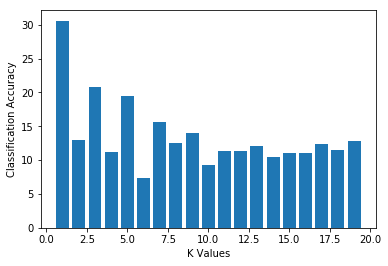

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(xRange,yRange)
plt.xlabel('K Values')
plt.ylabel('Classification Accuracy')
plt.show()

In [37]:
knnClassifier(normTestData,trainCSV_nb,trainCSV_b,feat_X,feat_Y,1)


Classification accuracy: 20.0 %


20.0